<a href="https://colab.research.google.com/github/niklinkov/EDA_carsModelandApp/blob/main/%22EDA_cars_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных Подержанные автомобили


### Описание данных

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
CUR_YEAR = 2023

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/cars.csv")

In [ ]:
df.head(3)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0

## Исследование данных

Размер датасета

In [ ]:
df.shape

(6999, 13)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Основные числовые характеристики

In [ ]:
df.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [ ]:
df.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

* в seats, mileage, engine, max_power и torque  есть пропуски

## Подготовка данных

### Brand and Model

* разобьем первый столбец на 3, марку и модель
* найдем модели, которые имеют пропуски в данных

In [ ]:
df_1 = df[:]
df_1[['name','model']]=df['name'].str.split(' ',n = 1, expand=True)
df_1[['model','other']]=df_1['model'].str.split(' ',n = 1, expand=True)
df_1.head(3)


name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2  Hyundai  2010         225000     127000  Diesel  Individual       Manual   

          owner     mileage   engine   max_power                    torque  \
0   First Owner   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm   
1  Second Owner  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm   
2   First Owner   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm   

   seats  model             other  
0    5.0  Swift         Dzire VDI  
1    5.0  Rapid  1.5 TDI Ambition  
2    5.0    i20     Sportz Diesel

In [ ]:
df_1['model'].value_counts(dropna=False)

In [ ]:
df_1['name'].value_counts(dropna=False)

### Numeric columns

так как признак скорее всего

In [ ]:
df_1['seats'].fillna(0.0, inplace=True)

In [ ]:
df.describe().round(2)

year  selling_price   km_driven    seats
count  6999.00        6999.00     6999.00  6999.00
mean   2013.82      639515.20    69584.62     5.26
std       4.05      808941.91    57724.00     1.31
min    1983.00       29999.00        1.00     0.00
25%    2011.00      254999.00    35000.00     5.00
50%    2015.00      450000.00    60000.00     5.00
75%    2017.00      675000.00    97000.00     5.00
max    2020.00    10000000.00  2360457.00    14.00

изменим тип данных на категорийный

In [ ]:
df_1['seats'] = df_1['seats'].astype('object')

### Год, пробег, цена

Заменим значение года выпуска на "возраст" машины

In [ ]:
df_1['year'] = CUR_YEAR - df_1['year']

In [ ]:
df_1[['year','km_driven','selling_price','seats']].describe().round(2)


year   km_driven  selling_price
count  6999.00     6999.00        6999.00
mean      9.18    69584.62      639515.20
std       4.05    57724.00      808941.91
min       3.00        1.00       29999.00
25%       6.00    35000.00      254999.00
50%       8.00    60000.00      450000.00
75%      12.00    97000.00      675000.00
max      40.00  2360457.00    10000000.00

Посмотрим на распределение цен

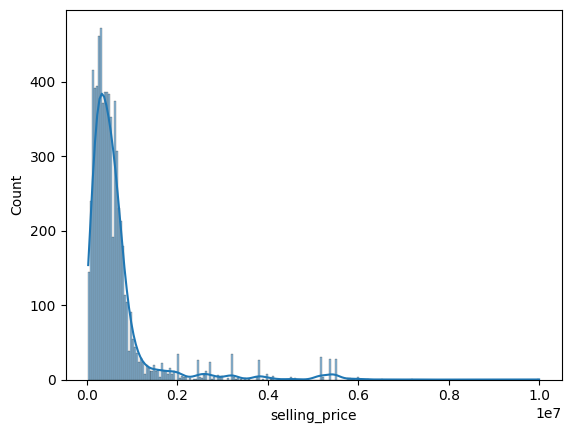

In [ ]:
sns.histplot(df_1['selling_price'], kde=True)
plt.show()

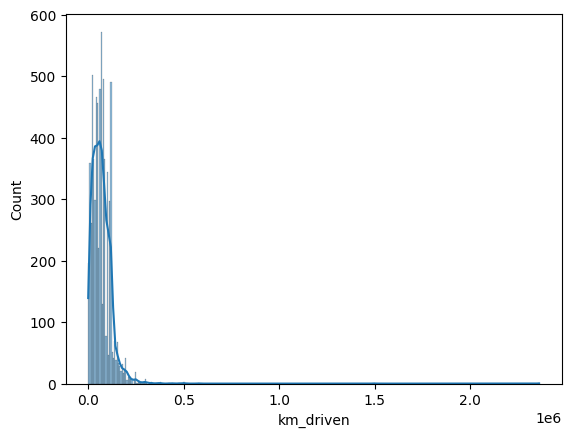

In [ ]:
sns.histplot(df_1['km_driven'], kde=True)
plt.show()

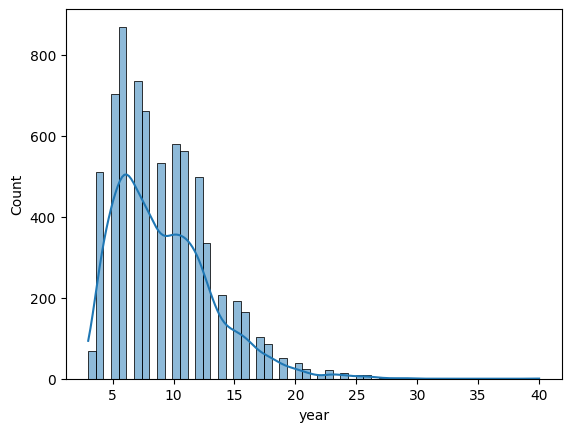

In [ ]:
sns.histplot(df_1['year'], kde=True)
plt.show()

### Categorical columns

### Уберем пропуски в столбцах Mileage, Engine, Max_power, Torque

Заменим промуски в столбце Mileage

In [ ]:
df_1['mileage'].value_counts(dropna=False, normalize=True).round(3)

NaN           0.029
18.9 kmpl     0.028
19.7 kmpl     0.021
18.6 kmpl     0.020
21.1 kmpl     0.019
              ...  
13.73 kmpl    0.000
19.69 kmpl    0.000
17.8 km/kg    0.000
10.9 kmpl     0.000
16.51 kmpl    0.000
Name: mileage, Length: 387, dtype: float64

заменим неизвестный расход на "unknown"

In [ ]:
df_1['mileage'].fillna("-1 unknown", inplace=True)

df_1['mileage'].value_counts(dropna=False)

-1 unknown    202
18.9 kmpl     197
19.7 kmpl     150
18.6 kmpl     139
21.1 kmpl     131
             ... 
13.73 kmpl      1
19.69 kmpl      1
17.8 km/kg      1
10.9 kmpl       1
16.51 kmpl      1
Name: mileage, Length: 387, dtype: int64

Заменим промуски в столбце Engine

In [ ]:
df_1['engine'].value_counts(dropna=False)

1248 CC    885
1197 CC    715
998 CC     393
796 CC     375
2179 CC    330
          ... 
1339 CC      1
1489 CC      1
1422 CC      1
2496 CC      1
1950 CC      1
Name: engine, Length: 121, dtype: int64

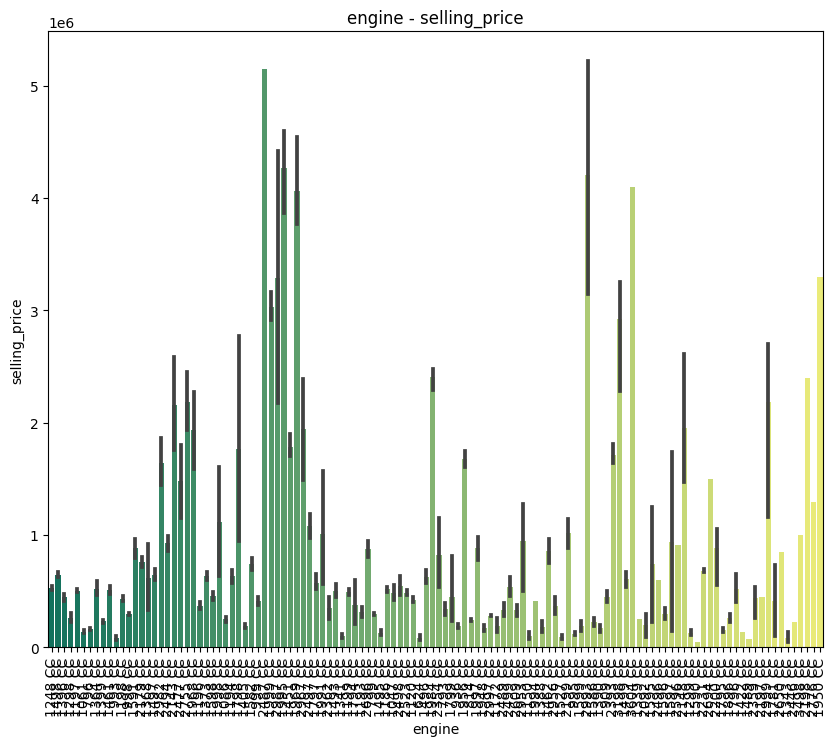

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='engine', y='selling_price', data = df_1, palette='summer', )
plt.title('engine - selling_price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_1['engine'].fillna("-1 unknown", inplace=True)

df_1['engine'].value_counts(dropna=False)

1248 CC    885
1197 CC    715
998 CC     393
796 CC     375
2179 CC    330
          ... 
1339 CC      1
1489 CC      1
1422 CC      1
2496 CC      1
1950 CC      1
Name: engine, Length: 121, dtype: int64

Заменим промуски в столбце Max_power

In [ ]:
df_1['max_power'].value_counts(dropna=False)

74 bhp        330
NaN           196
81.80 bhp     193
88.5 bhp      172
67 bhp        149
             ... 
58.33 bhp       1
170.63 bhp      1
282 bhp         1
149.5 bhp       1
177.5 bhp       1
Name: max_power, Length: 317, dtype: int64

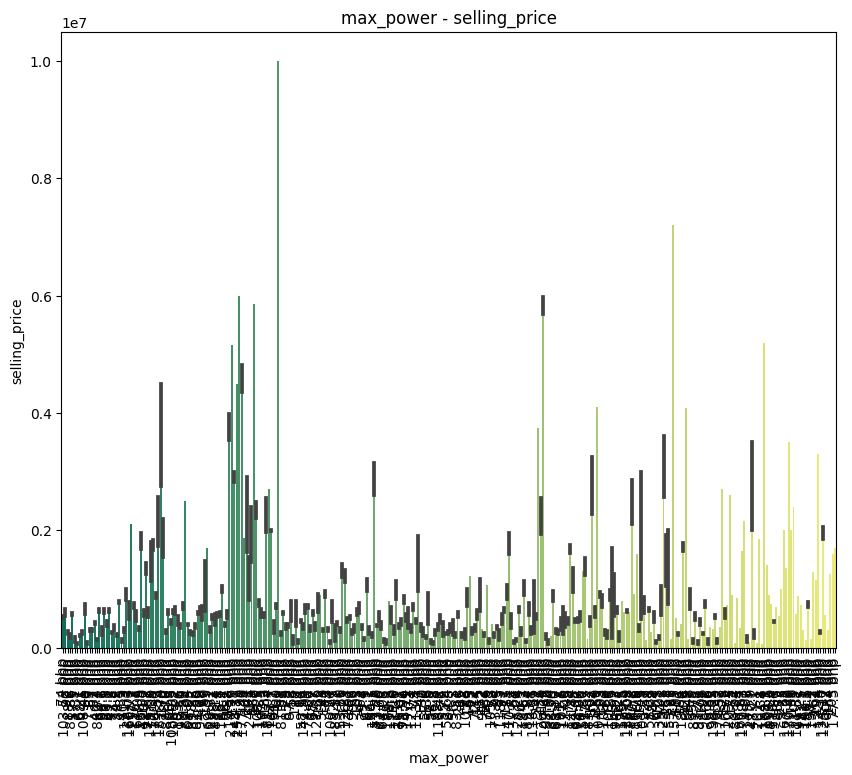

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='max_power', y='selling_price', data = df_1, palette='summer', )
plt.title('max_power - selling_price')
plt.xticks(rotation='vertical')
plt.show()

заменим пропуски и добавим единицу измерения для нулевых значений

In [ ]:
df_1['max_power'].fillna("-1 unknown", inplace=True)
df_1['max_power'] = np.where(df_1['max_power'] == '0', '0 bhp', df_1['max_power'])
df_1['max_power'].value_counts(dropna=False)

74 bhp        330
-1 unknown    196
81.80 bhp     193
88.5 bhp      172
67 bhp        149
             ... 
58.33 bhp       1
170.63 bhp      1
282 bhp         1
149.5 bhp       1
177.5 bhp       1
Name: max_power, Length: 317, dtype: int64

In [ ]:
df_1['max_power'].value_counts(dropna=False)

74 bhp        330
-1 unknown    196
81.80 bhp     193
88.5 bhp      172
67 bhp        149
             ... 
58.33 bhp       1
170.63 bhp      1
282 bhp         1
149.5 bhp       1
177.5 bhp       1
Name: max_power, Length: 317, dtype: int64

Заменим промуски в столбце Torque

In [ ]:
df_1['torque'].fillna("-1 Nm -1 rpm", inplace=True)

df_1['torque'].value_counts(dropna=False)


190Nm@ 2000rpm         468
200Nm@ 1750rpm         381
90Nm@ 3500rpm          350
-1 Nm -1 rpm           203
113Nm@ 4200rpm         196
                      ... 
250 Nm at 2750 rpm       1
170Nm@ 4200rpm           1
136.3Nm@ 4200rpm         1
11@ 3,000(kgm@ rpm)      1
250Nm@ 1250-5000rpm      1
Name: torque, Length: 420, dtype: int64

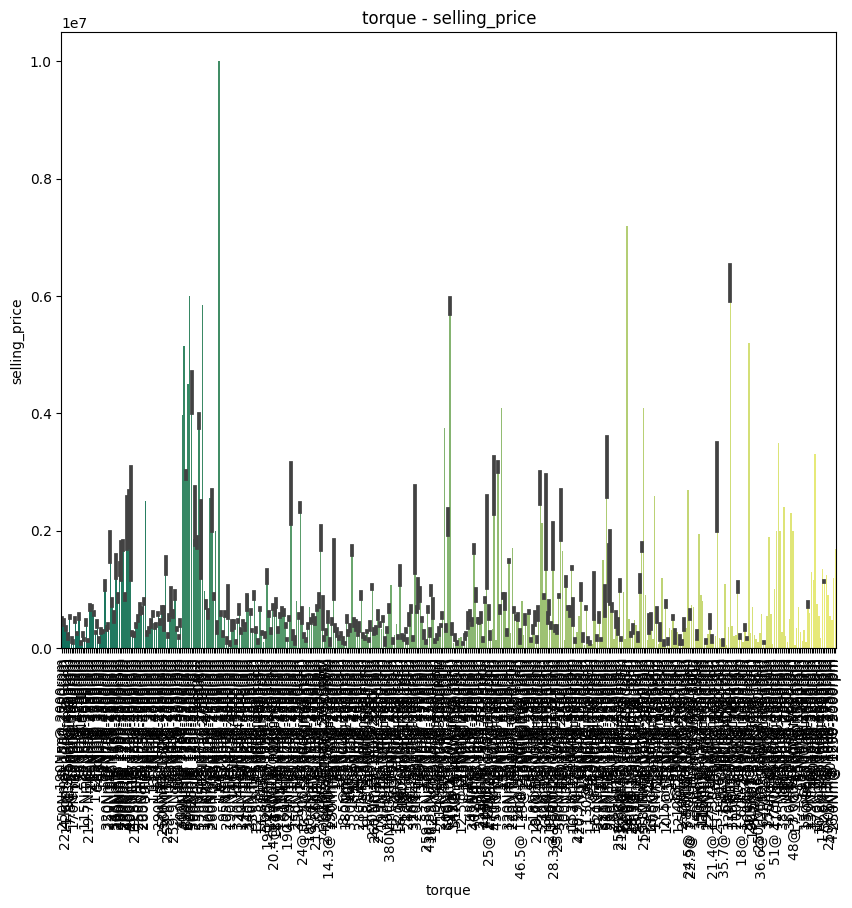

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='torque', y='selling_price', data = df_1, palette='summer', )
plt.title('torque - selling_price')
plt.xticks(rotation='vertical')
plt.show()

### Приведем данные в стобце к однотипному форматированию

In [ ]:
df_2 = df_1[:]

Приведем к общему виду некоторые ячейки

In [ ]:
df_2['torque'] = np.where(df_2['torque'] == '380Nm(38.7kgm)@ 2500rpm', '380 Nm 2500 rpm', df_2['torque'])
df_2['torque'] = np.where(df_2['torque'] == '250@ 1250-5000rpm', '250 Nm 5000 rpm	', df_2['torque'])
df_2['torque'] = np.where(df_2['torque'] == '510@ 1600-2400', '510 Nm 2400 rpm	', df_2['torque'])
df_2['torque'] = np.where(df_2['torque'] == '48@ 3,000+/-500(NM@ rpm)', '48 Nm 3000 rpm	', df_2['torque'])
df_2['torque'] = np.where(df_2['torque'] == '210 / 1900', '210 Nm 1900 rpm	', df_2['torque'])



Обработаем остальные

In [ ]:
df_2['torque'] = df_2['torque'].str.replace(r"[nN][Mm][@]", " Nm", regex=True) #заменить nM@ NM@ Nm@ nm@ на Nm
df_2['torque'] = df_2['torque'].str.replace(r"[nN][mM]", " Nm", regex=True)
df_2['torque'] = df_2['torque'].str.replace(r",", "", regex=True) # убрать ,
df_2['torque'] = df_2['torque'].str.replace(r"at", "", regex=True) # убрать at
df_2['torque'] = df_2['torque'].str.replace(r"[0-9]+[-~]", "", regex=True) # убрать первую половину значения rpm
df_2['torque'] = df_2['torque'].str.replace("\+/-[0-9]+", " ", regex=True) # убрать записи +/-500 и им подобные
df_2['torque'] = df_2['torque'].str.replace(r'\(kgm[@ ]+rpm\)', " krpm ", regex=True) #заменить скобки на krpm

In [ ]:
df_2['torque'] = df_2['torque'].str.replace(" /", " ", regex=True) # убираем / из текста
df_2['torque'] = df_2['torque'].str.replace(r"KGM", " kgm ", regex=True) # приведем к одному виду
df_2['torque'] = df_2['torque'].str.replace(r"RPM", "rpm", regex=True) # приведем к одному виду
df_2['torque'] = df_2['torque'].str.replace(r"kgm@ ", " kgm ", regex=True) # уберем знак @ и добавим пробел
df_2['torque'] = df_2['torque'].str.replace(r"@ ", " kgm ", regex=True) # убираем знак @ из оставшихся записей
df_2['torque'] = df_2['torque'].str.replace("krpm", " rpm", regex=False) # приведем rpm к одному виду
df_2['torque'] = df_2['torque'].str.replace("rpm", " rpm", regex=False)
df_2['torque'] = df_2['torque'].str.replace("  ", " ", regex=False) # уберем двойные пробелы
df_2['torque'] = df_2['torque'].str.replace("  ", " ", regex=False) # уберем двойные пробелы


In [ ]:
test = df_2[df_2['torque'].str.contains('21800')]
test.head(5)

In [ ]:
test[['torque','torque_scale']]=test['torque'].str.split(' ',n = 1, expand=True)
test[['torque_scale','rpm_value']]=test['torque_scale'].str.split(' ',n = 1, expand=True)
test.head(2)

In [ ]:
test.describe(include='object')

In [ ]:
test['rpm_value'].fillna("-1 rpm", inplace=True)


In [ ]:
test[['rpm_value','rpm_scale']]=test['rpm_value'].str.split(' ', n = 1, expand=True)


In [ ]:
test['rpm_scale'].fillna("rpm", inplace=True)

In [ ]:
test[test['rpm_value'].isna()]

In [ ]:
test[test['rpm_value'].str.contains('~')]

In [ ]:
test['rpm_value'].value_counts(dropna=False)

даные в этих столбцах в таком виде не влияют на цену (не получится отследить зависимость цены от этих данных). Попробуем выделить числовую и категориальную часть

столбцы не имеют пропусков отформатированы, на следующем шаге выделим числовую и категориальную часть

### Разобьем ячейки на две: числовое значение и единицу измеренеия.

In [ ]:
df_3 = df_2 [:]
df_3[['mileage','mileage_scale']]=df_3['mileage'].str.split(' ',n = 1, expand=True)
df_3[['engine','engine_type']]=df_3['engine'].str.split(' ',n = 1, expand=True)
df_3[['max_power','power_scale']]=df_3['max_power'].str.split(' ',n = 1, expand=True)
df_3[['torque','torque_scale']]=df_3['torque'].str.split(' ',n = 1, expand=True)
df_3[['torque_scale','rpm_value']]=df_3['torque_scale'].str.split(' ',n = 1, expand=True)
df_3.head(3)

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti     9         450000     145500  Diesel  Individual       Manual   
1    Skoda     9         370000     120000  Diesel  Individual       Manual   
2  Hyundai    13         225000     127000  Diesel  Individual       Manual   

          owner mileage engine max_power torque seats  model  \
0   First Owner    23.4   1248        74    190   5.0  Swift   
1  Second Owner   21.14   1498    103.52    250   5.0  Rapid   
2   First Owner    23.0   1396        90   22.4   5.0    i20   

              other mileage_scale engine_type power_scale torque_scale  \
0         Dzire VDI          kmpl          CC         bhp           Nm   
1  1.5 TDI Ambition          kmpl          CC         bhp           Nm   
2     Sportz Diesel          kmpl          CC         bhp          kgm   

  rpm_value  
0  2000 rpm  
1  2500 rpm  
2  2750 rpm

Заполним пропуски в столбцах rmp_value и rpm_scale

In [ ]:
df_3['rpm_value'].fillna("-1 rpm", inplace=True)



In [ ]:
df_3[['rpm_value','rpm_scale']]=df_3['rpm_value'].str.split(' ', n = 1, expand=True)


In [ ]:
df_3['rpm_scale'].fillna("rpm", inplace=True)

In [ ]:
df_3.describe()

In [ ]:
df_3.describe(include='object')

In [ ]:
df_3.head(2)

In [ ]:
df_3['rpm_value'] = df_3['rpm_value'].astype('float')

In [ ]:
test.describe()

### Преобразуем данные к вещественному типу в столбцах milage, max_power, torque, rpm_value

In [ ]:
df_4=df_3[['selling_price', 'name', 'model', 'other', 'fuel', 'transmission', 'year', 'seats', 'km_driven', 'seller_type', 'owner', 'mileage', 'mileage_scale', 'engine', 'engine_type', 'max_power', 'power_scale', 'torque', 'torque_scale', 'rpm_value', 'rpm_scale']]
df_4.head(3)

In [ ]:
df_4.describe(include='object')

In [ ]:
df_4['max_power'] = np.where(df_4['max_power'] == '', 0, df_4['max_power'])

In [ ]:
df_4['mileage'] = df_4['mileage'].astype('float')
df_4['engine'] = df_4['engine'].astype('int')
df_4['max_power'] = df_4['max_power'].astype('float')
df_4['torque'] = df_4['torque'].astype('float')

In [ ]:
df_4.describe().round(2)

In [ ]:
df_4.describe(include='object')

* Приведем значения момента к одной единице измерения, чтобы можно было оценить влияние на целевую величину

In [ ]:
df_4['torque_scale'].value_counts(dropna=False)

In [ ]:
df_4['torque'] = np.where((df_4['torque_scale'] == 'kgm'), df_4['torque']*9.8, df_4['torque'])

In [ ]:
df_4[df_4['torque_scale'] == 'kgm'].head(3)

Заменим -1 на среднее значение

In [ ]:

df_4['torque'] = np.where(df_4['torque'] == -1, df_4[df_4['torque']!= -1]['torque'].mean(), df_4['torque'])

In [ ]:
df_4['mileage'] = np.where(df_4['mileage'] == -1, df_4[df_4['mileage']!= -1]['mileage'].mean(), df_4['mileage'])
df_4['engine'] = np.where(df_4['engine'] == -1, df_4[df_4['engine']!= -1]['engine'].mean(), df_4['engine'])
df_4['max_power'] = np.where(df_4['max_power'] == -1, df_4[df_4['max_power']!= -1]['max_power'].mean(), df_4['max_power'])
df_4['rpm_value'] = np.where(df_4['rpm_value'] == -1, df_4[df_4['rpm_value']!= -1]['rpm_value'].mean(), df_4['rpm_value'])

In [ ]:
df_4.describe().round(2)

In [ ]:
df_4.describe(include='object')

## Проверим влияние новых данных на целевую переменную


In [ ]:
df_4['power_scale'].value_counts(dropna=False)

bhp        6803
unknown     196
Name: power_scale, dtype: int64

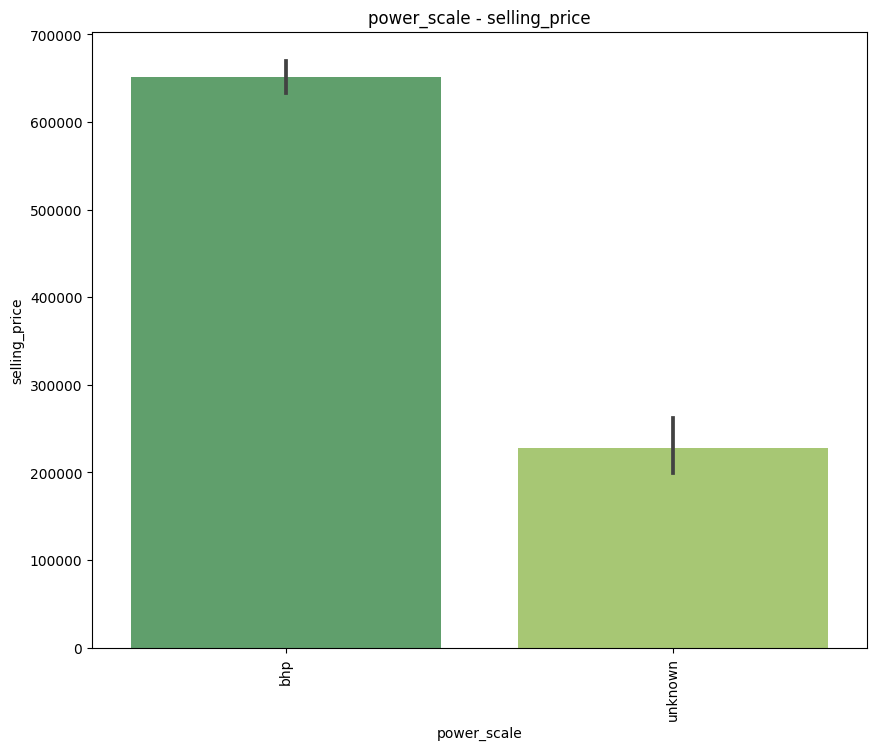

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='power_scale', y='selling_price', data = df_4, palette='summer', )
plt.title('power_scale - selling_price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_4['engine_type'].value_counts(dropna=False)

CC         6797
unknown     202
Name: engine_type, dtype: int64

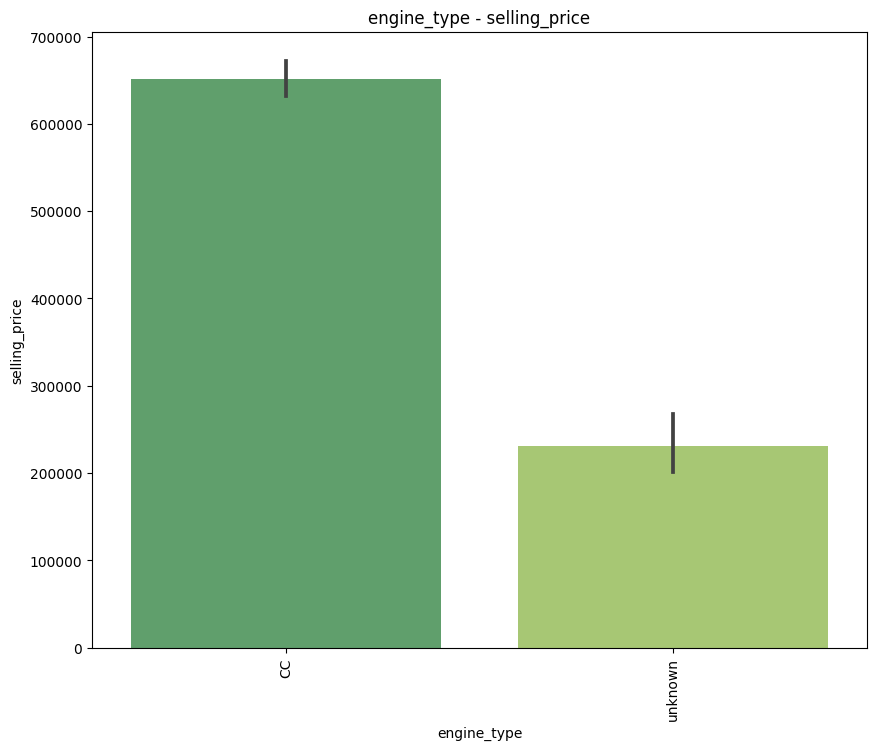

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='engine_type', y='selling_price', data = df_4, palette='summer', )
plt.title('engine_type - selling_price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_4['mileage_scale'].value_counts(dropna=False)

kmpl       6718
unknown     202
km/kg        79
Name: mileage_scale, dtype: int64

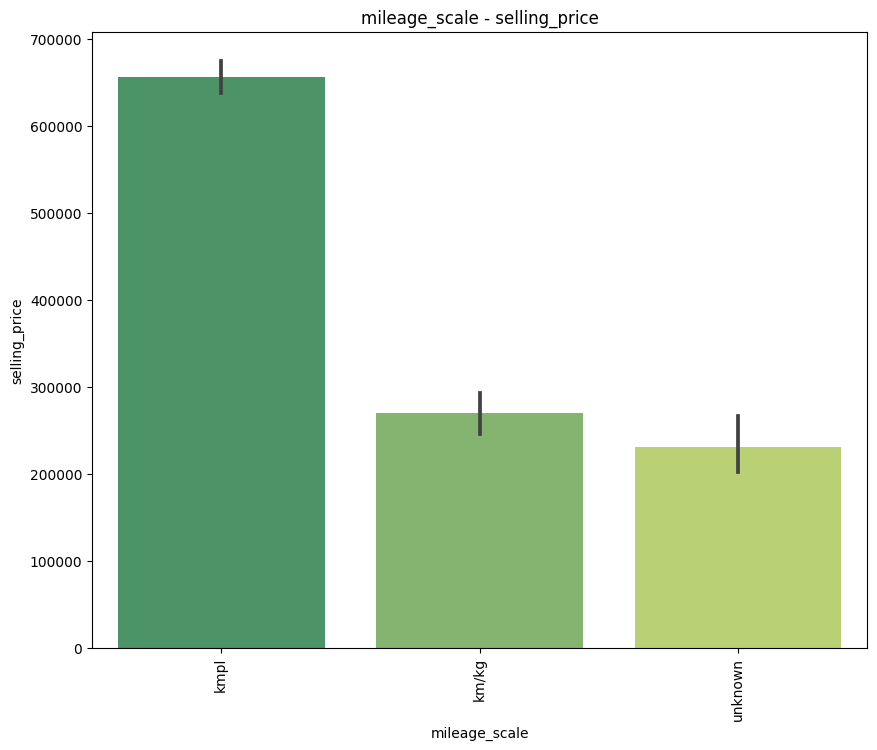

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='mileage_scale', y='selling_price', data = df_4, palette='summer', )
plt.title('mileage_scale - selling_price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_3['seats'].value_counts(dropna=False)

5.0     5393
7.0      944
8.0      208
0.0      202
4.0      104
9.0       72
6.0       54
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

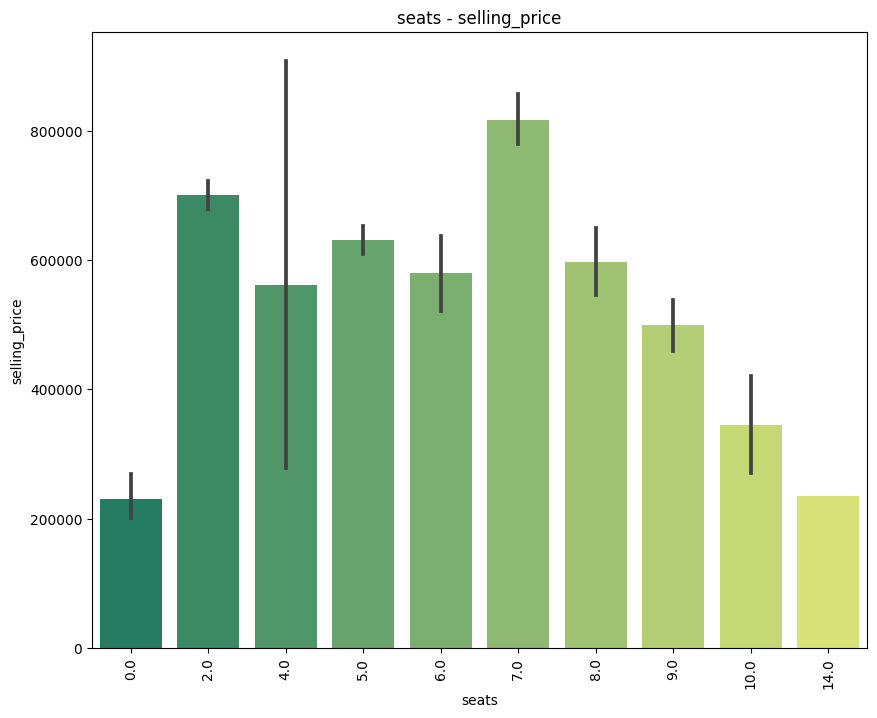

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='seats', y='selling_price', data = df_4, palette='summer', )
plt.title('seats - selling_price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_4.describe(include='object')

name  model      other    fuel transmission   seats seller_type  \
count     6999   6999       6999    6999         6999  6999.0        6999   
unique      30    202       1792       4            2    10.0           3   
top     Maruti  Swift  Dzire VDI  Diesel       Manual     5.0  Individual   
freq      2126    689        116    3793         6095  5393.0        5826   

              owner mileage_scale engine_type power_scale torque_scale  \
count          6999          6999        6999        6999         6999   
unique            5             3           2           2            2   
top     First Owner          kmpl          CC         bhp           Nm   
freq           4587          6718        6797        6803         6563   

       rpm_scale  
count       6999  
unique         3  
top          rpm  
freq        6632

### Проверим связь вещественных факторов на целевую переменную

In [ ]:
df_4.describe()

selling_price         year     km_driven      mileage       engine  \
count   6.999000e+03  6999.000000  6.999000e+03  6999.000000  6999.000000   
mean    6.395152e+05     9.181597  6.958462e+04    19.426604  1458.327203   
std     8.089419e+05     4.053095  5.772400e+04     3.986874   493.897490   
min     2.999900e+04     3.000000  1.000000e+00     0.000000   624.000000   
25%     2.549990e+05     6.000000  3.500000e+04    16.800000  1197.000000   
50%     4.500000e+05     8.000000  6.000000e+04    19.426604  1248.000000   
75%     6.750000e+05    12.000000  9.700000e+04    22.150000  1582.000000   
max     1.000000e+07    40.000000  2.360457e+06    42.000000  3604.000000   

         max_power       torque     rpm_value  
count  6999.000000  6999.000000   6999.000000  
mean     91.486573   180.820614   3079.701241  
std      35.330750   108.451067    920.041890  
min       0.000000    47.040000   1400.000000  
25%      68.050000   113.000000   2500.000000  
50%      83.100000   180.000000   3000.000000  
75%     100.600000   205.000000   4000.000000  
max     400.000000  1862.000000  21800.000000

<Axes: >

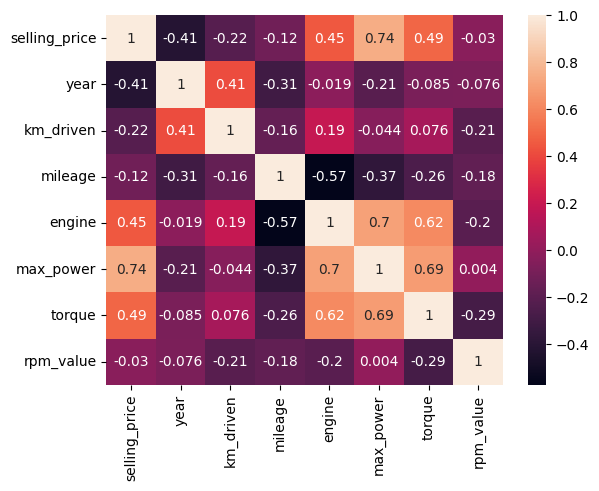

In [ ]:
corr = df_4[['selling_price','year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'rpm_value']].corr()

#sns.heatmap(corr cmap="crest")
sns.heatmap(corr, annot=True)

## Производитель автомобиля

In [ ]:
df_4['name'].value_counts(dropna=False)

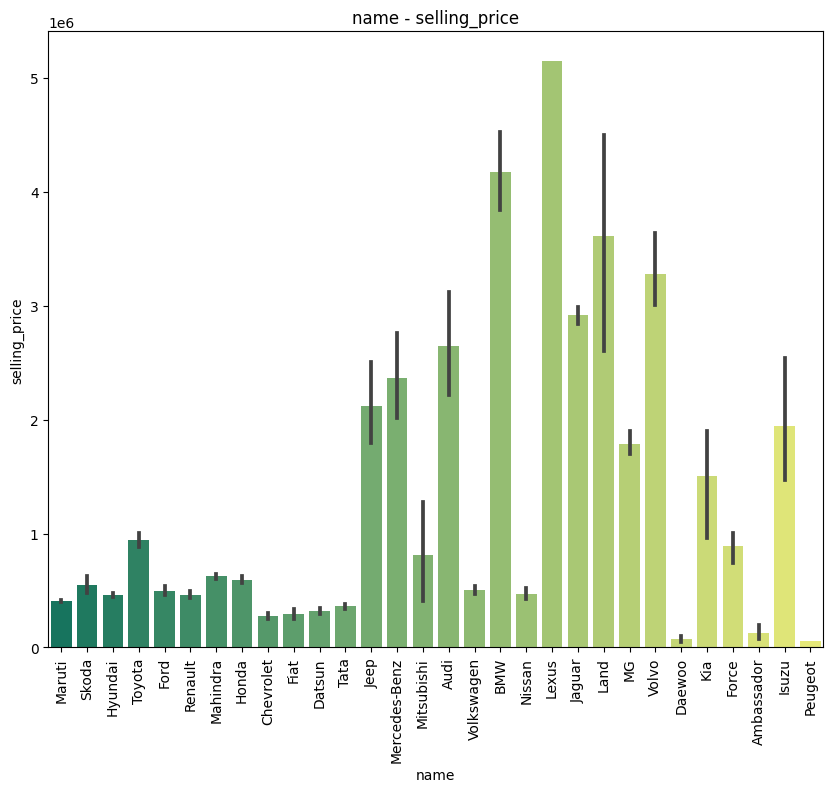

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='name', y='selling_price', data = df_4, palette='summer', )
plt.title('name - selling_price')
plt.xticks(rotation='vertical')
plt.show()

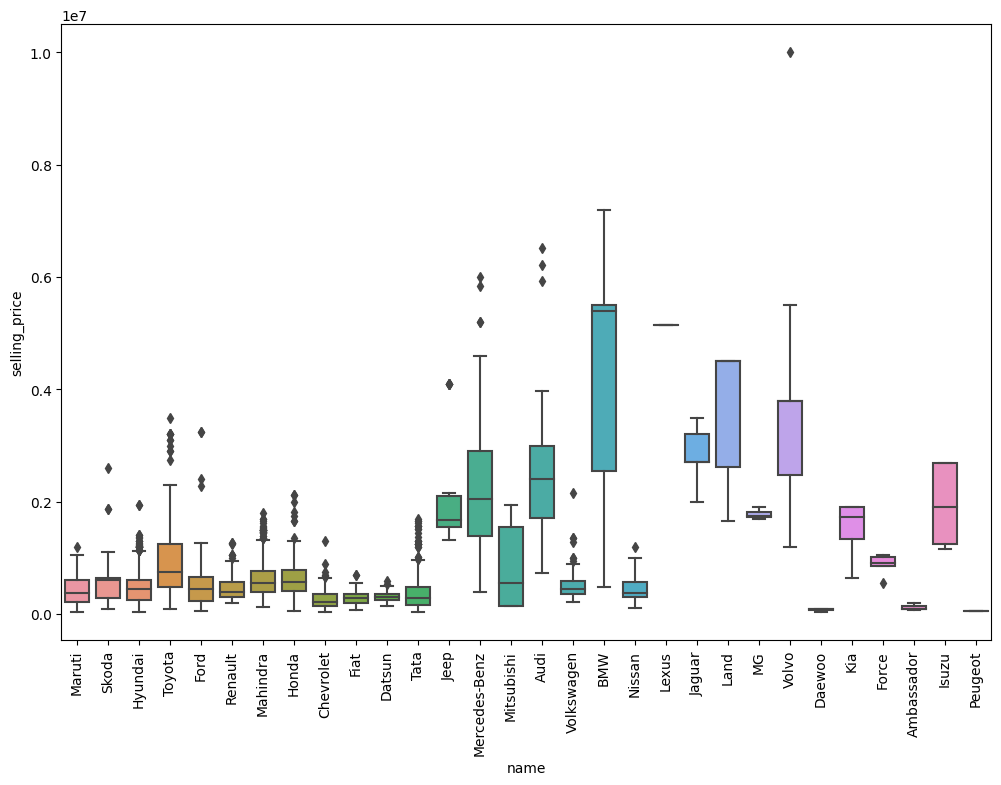

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="name", y="selling_price", data=df_4)
plt.xticks(rotation='vertical')
plt.show()

## Тип топлива автомобиля

In [ ]:
df_4['fuel'].value_counts(dropna=False, normalize=True)

Diesel    0.541935
Petrol    0.445778
CNG       0.007430
LPG       0.004858
Name: fuel, dtype: float64

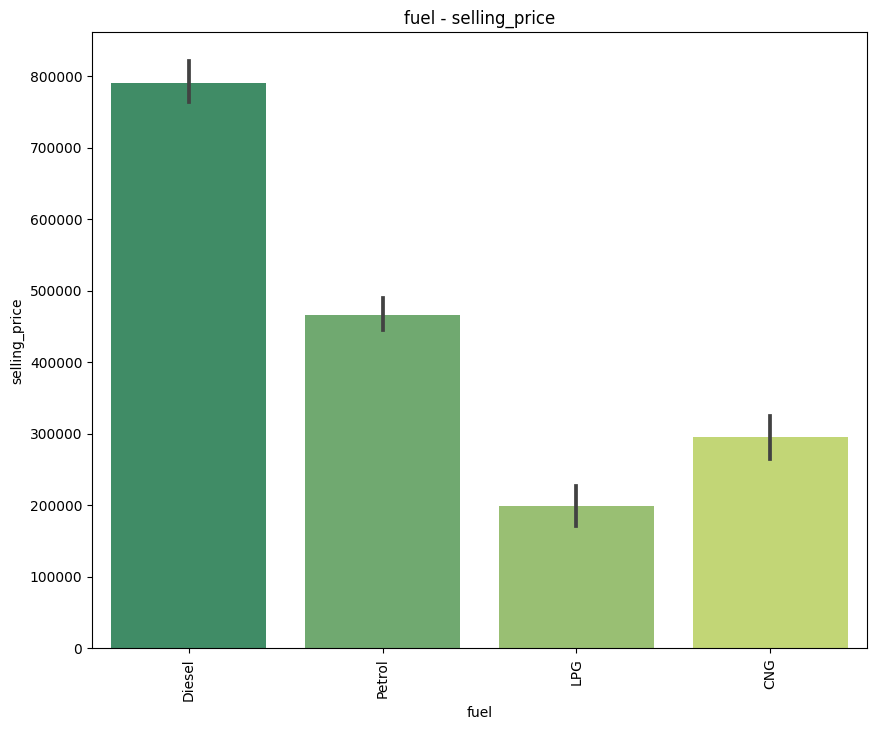

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='fuel', y='selling_price', data = df_4, palette='summer', )
plt.title('fuel - selling_price')
plt.xticks(rotation='vertical')
plt.show()

### Продавец

In [ ]:
df_4['seller_type'].value_counts(dropna=False, normalize=True)

Individual          0.832405
Dealer              0.138163
Trustmark Dealer    0.029433
Name: seller_type, dtype: float64

Посмотрим простую гистограмму по типу продавца

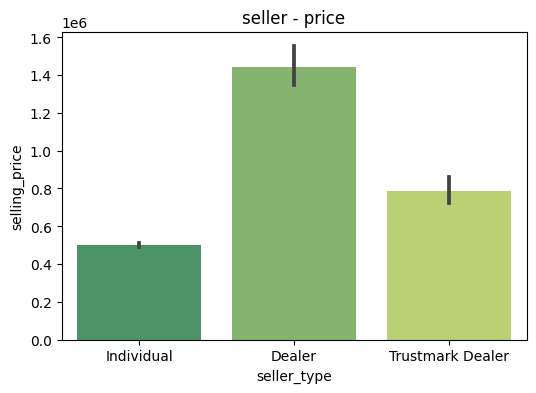

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='seller_type', y='selling_price', data = df, palette='summer')
plt.title('seller - price')
plt.show()

### Тип коробки передач

In [ ]:
df_4['transmission'].value_counts(dropna=False, normalize=True)

Manual       0.870839
Automatic    0.129161
Name: transmission, dtype: float64

Посмотрим на ящик с усами, отображающий распределение стоимости в зависимости от типа коробки передач

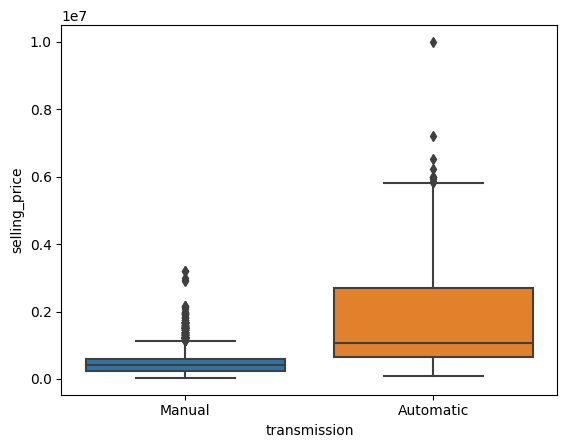

In [ ]:
sns.boxplot(x="transmission", y="selling_price", data=df_4)
plt.show()

### Количество владельцев

In [ ]:
df_4['owner'].value_counts(dropna=False, normalize=True)

First Owner             0.655379
Second Owner            0.255894
Third Owner             0.067581
Fourth & Above Owner    0.020574
Test Drive Car          0.000572
Name: owner, dtype: float64

Посмотрим простую гистограмму по типу продавца

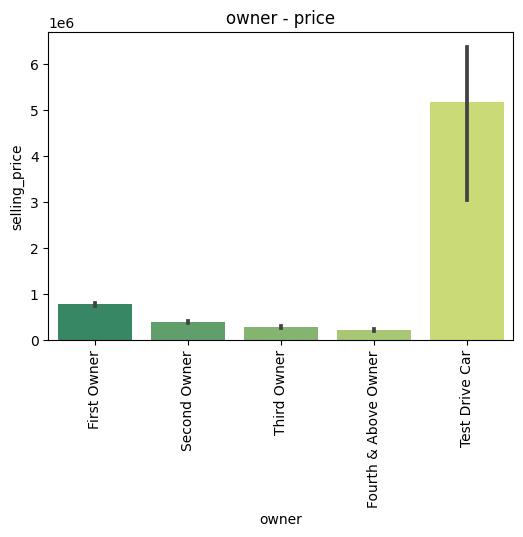

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='owner', y='selling_price', data = df, palette='summer')
plt.title('owner - price')
plt.xticks(rotation='vertical')
plt.show()

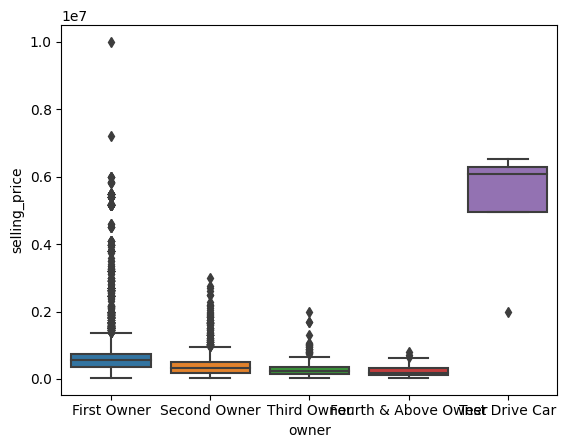

In [ ]:
sns.boxplot(x="owner", y="selling_price", data=df_4)
plt.xticks(rotation='vertical')
plt.show()

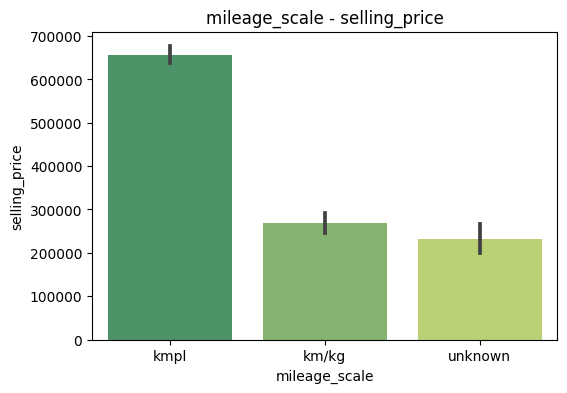

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='mileage_scale', y='selling_price', data = df_4, palette='summer')
plt.title('mileage_scale - selling_price')
plt.show()

Углубимся в разведочный анализ, и посмотрим как влияет связка факторов на балл:

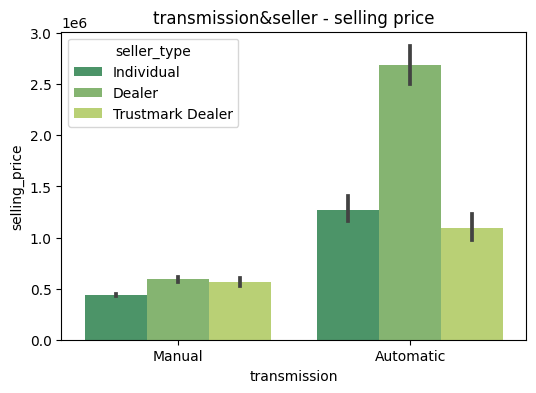

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='transmission', y='selling_price', hue='seller_type', data = df_4, palette='summer')
plt.title('transmission&seller - selling price')
plt.show()

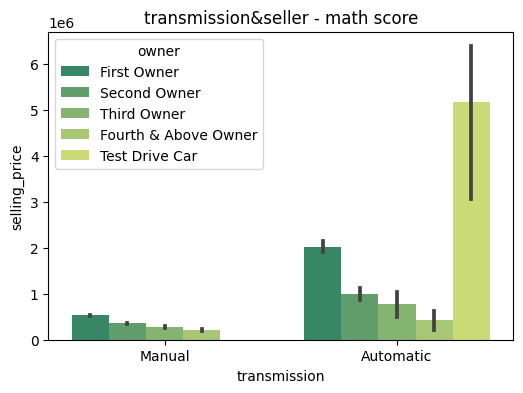

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='transmission', y='selling_price', hue='owner', data = df_4, palette='summer')
plt.title('transmission&seller - selling_price')
plt.show()

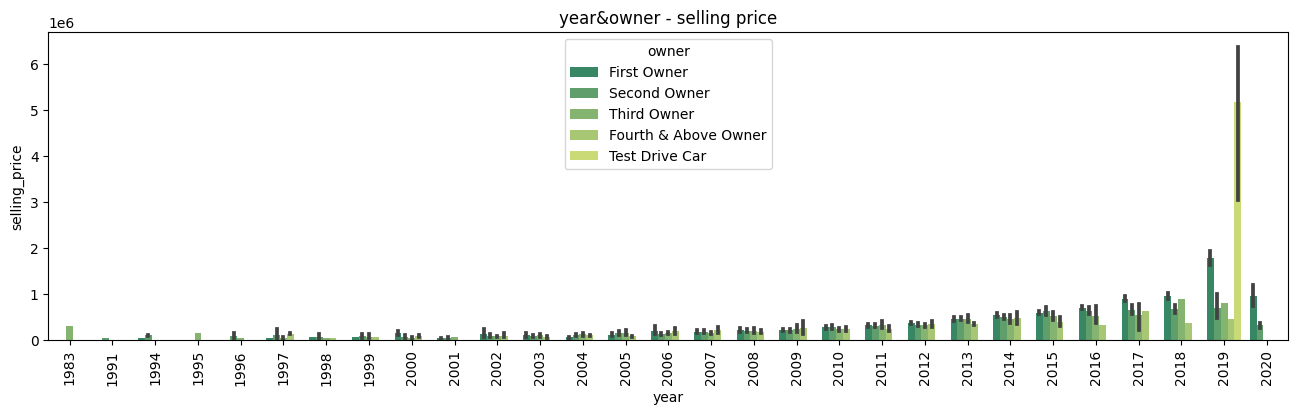

In [ ]:
plt.figure(figsize=(16,4))

sns.barplot(x='year', y='selling_price', hue='owner', data = df_4, palette='summer')
plt.title('year&owner - selling price')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_4.describe(include='object')

name    fuel seller_type transmission        owner   seats  \
count     6999    6999        6999         6999         6999  6999.0   
unique      30       4           3            2            5    10.0   
top     Maruti  Diesel  Individual       Manual  First Owner     5.0   
freq      2126    3793        5826         6095         4587  5393.0   

                  model mileage_scale engine_type power_scale torque_2  
count              6999          6999        6999        6999     6999  
unique             1924             3           2           2      168  
top     Swift Dzire VDI          kmpl          CC         bhp     4000  
freq                116          6718        6797        6797      740

# Машинное обучение

## Предсказание стоимости машины

**Цель:** попробуем по характеристикам автомобиля предсказать, рыночную цену на него

В первом приближении удалим столбцы с единицами измерения, связанными величинами (макс, крутящий момент, объем двигателя) и большим ко-вом котегориальных признаков

selling_price', 'name', 'model', 'other', 'fuel', 'transmission', 'year', 'seats', 'km_driven', 'seller_type', 'owner', 'mileage', 'mileage_scale', 'engine', 'engine_type', 'max_power', 'power_scale', 'torque', 'torque_scale', 'rpm_value', 'rpm_scale'

In [ ]:
X_data = df_4.drop(['selling_price', 'model', 'other', 'owner', 'mileage', 'mileage_scale', 'torque_scale', 'rpm_value', 'rpm_scale', 'power_scale'], axis=1)

y_data = df_4['selling_price'] # целевая переменная (target)

Чтобы применять классические модели машинного обучения, необходимо перевести категориальные (не являющиеся числами и не ведущие себя как числа) признаки в числовые.

Возьмем сейчас только бинарные признаки:
* `transmission`

Одну из категорий заменим на 1, другую на 0.

In [ ]:
X_data['engine_type'].value_counts()

CC         6797
unknown     202
Name: engine_type, dtype: int64

In [ ]:
X_data['transmission'] = X_data['transmission'].map({'Automatic' : 1, 'Manual' : 0})
X_data['engine_type'] = X_data['engine_type'].map({'CC' : 1, 'unknown' : 0})

In [ ]:
X_data['engine_type'].value_counts()

1    6797
0     202
Name: engine_type, dtype: int64

In [ ]:
X_data.head(5)

name    fuel  transmission  year seats seller_type  engine  engine_type  \
0   Maruti  Diesel             0     9   5.0  Individual  1248.0            1   
1    Skoda  Diesel             0     9   5.0  Individual  1498.0            1   
2  Hyundai  Diesel             0    13   5.0  Individual  1396.0            1   
3   Maruti  Petrol             0    16   5.0  Individual  1298.0            1   
4  Hyundai  Petrol             0     6   5.0  Individual  1197.0            1   

   max_power  torque  
0      74.00  190.00  
1     103.52  250.00  
2      90.00  219.52  
3      88.20  112.70  
4      81.86  113.75

In [ ]:
categorial_features = ['name','fuel', 'seats', 'seller_type']
real_features = ['year','transmission','max_power', 'engine', 'engine_type', 'torque', 'km_driven']
target_feature = 'selling_price'

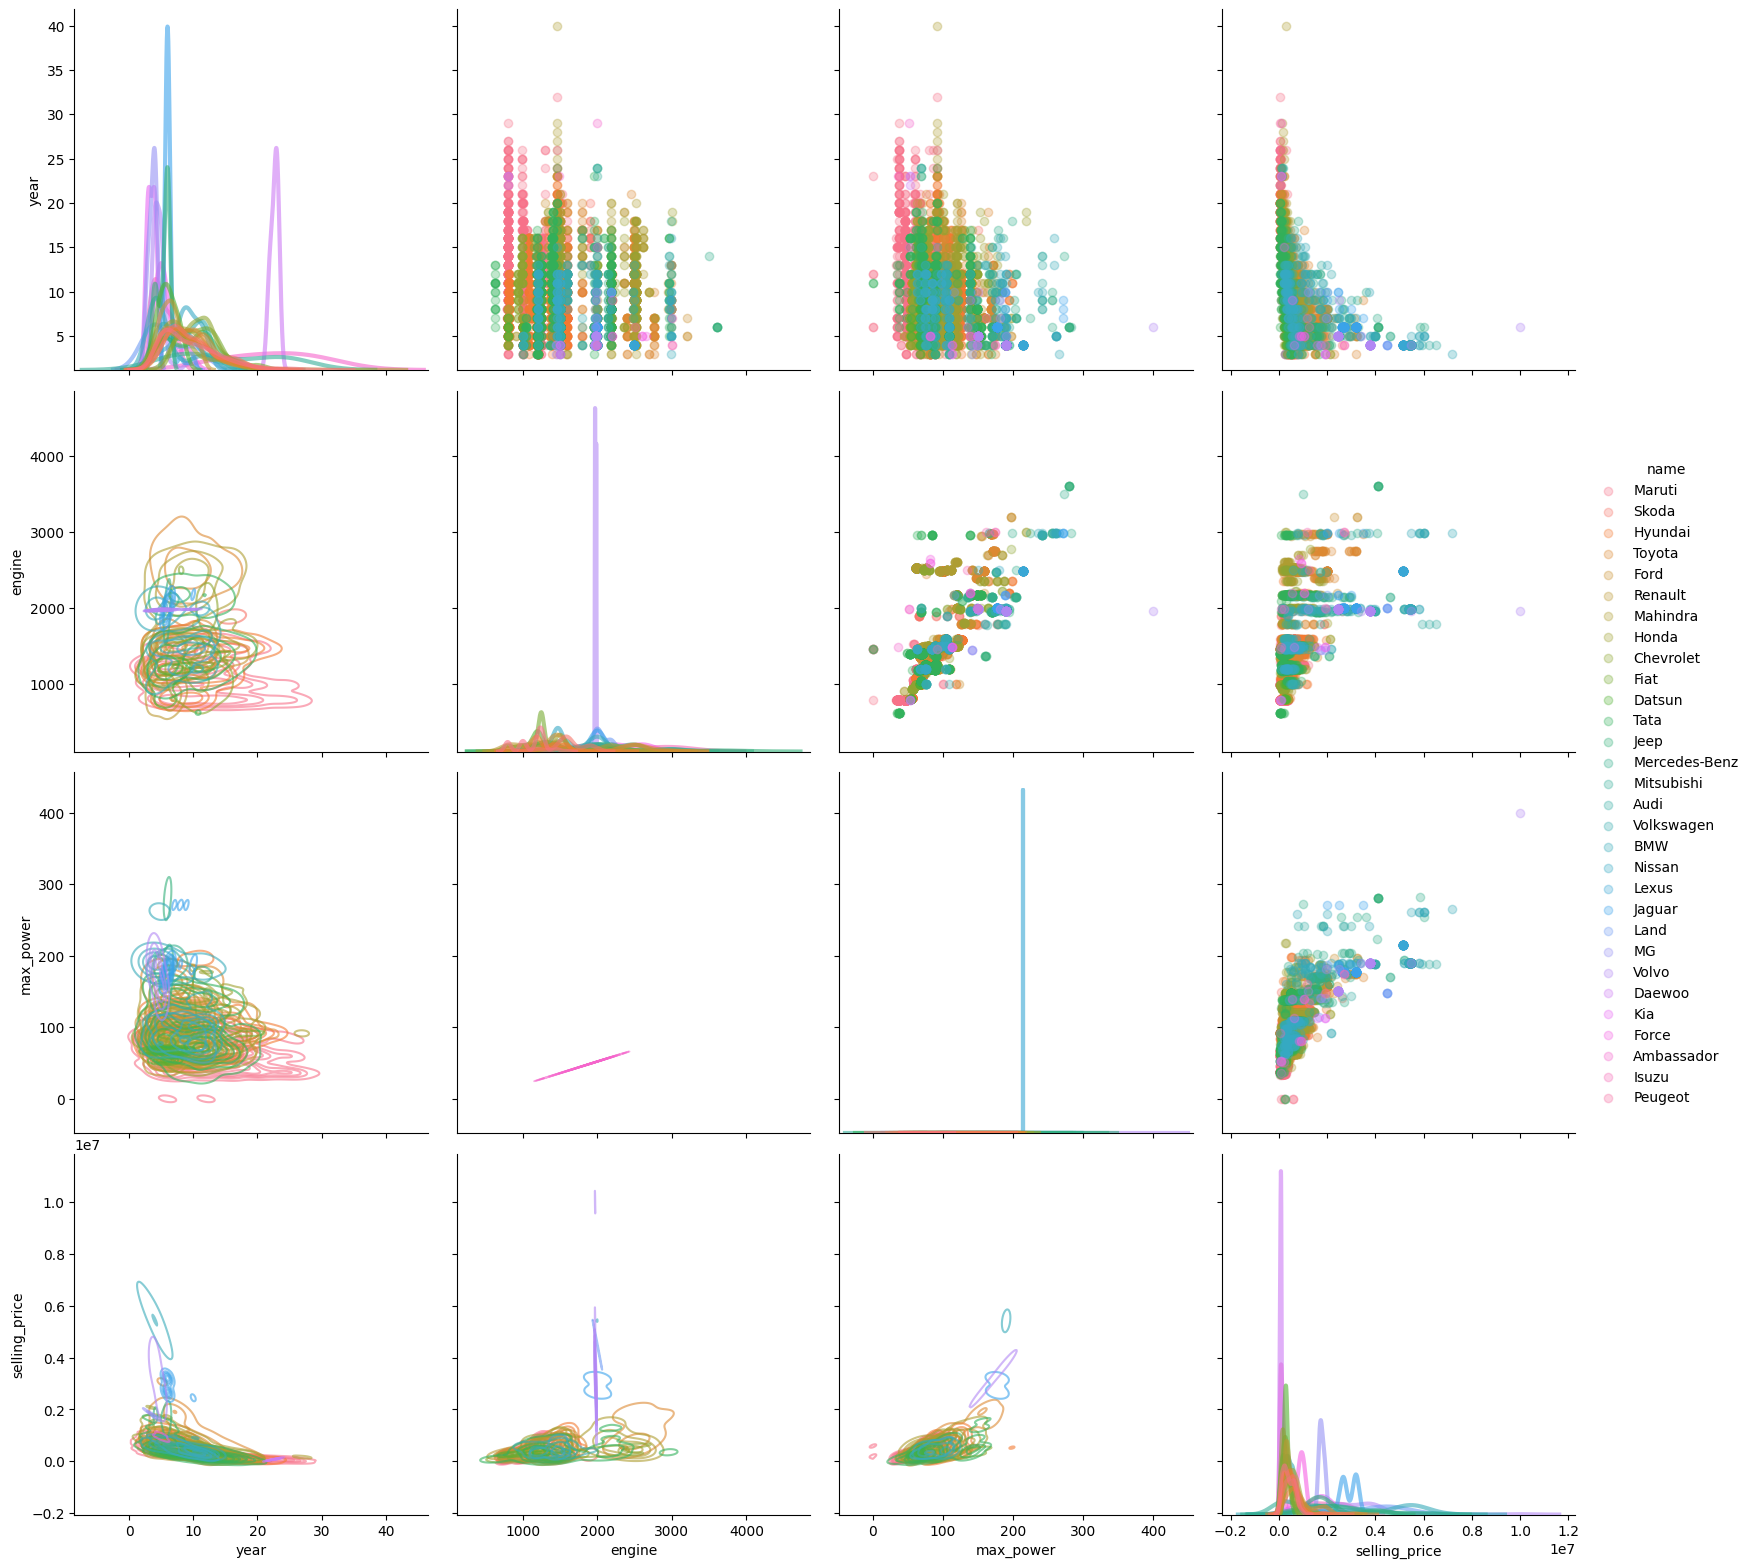

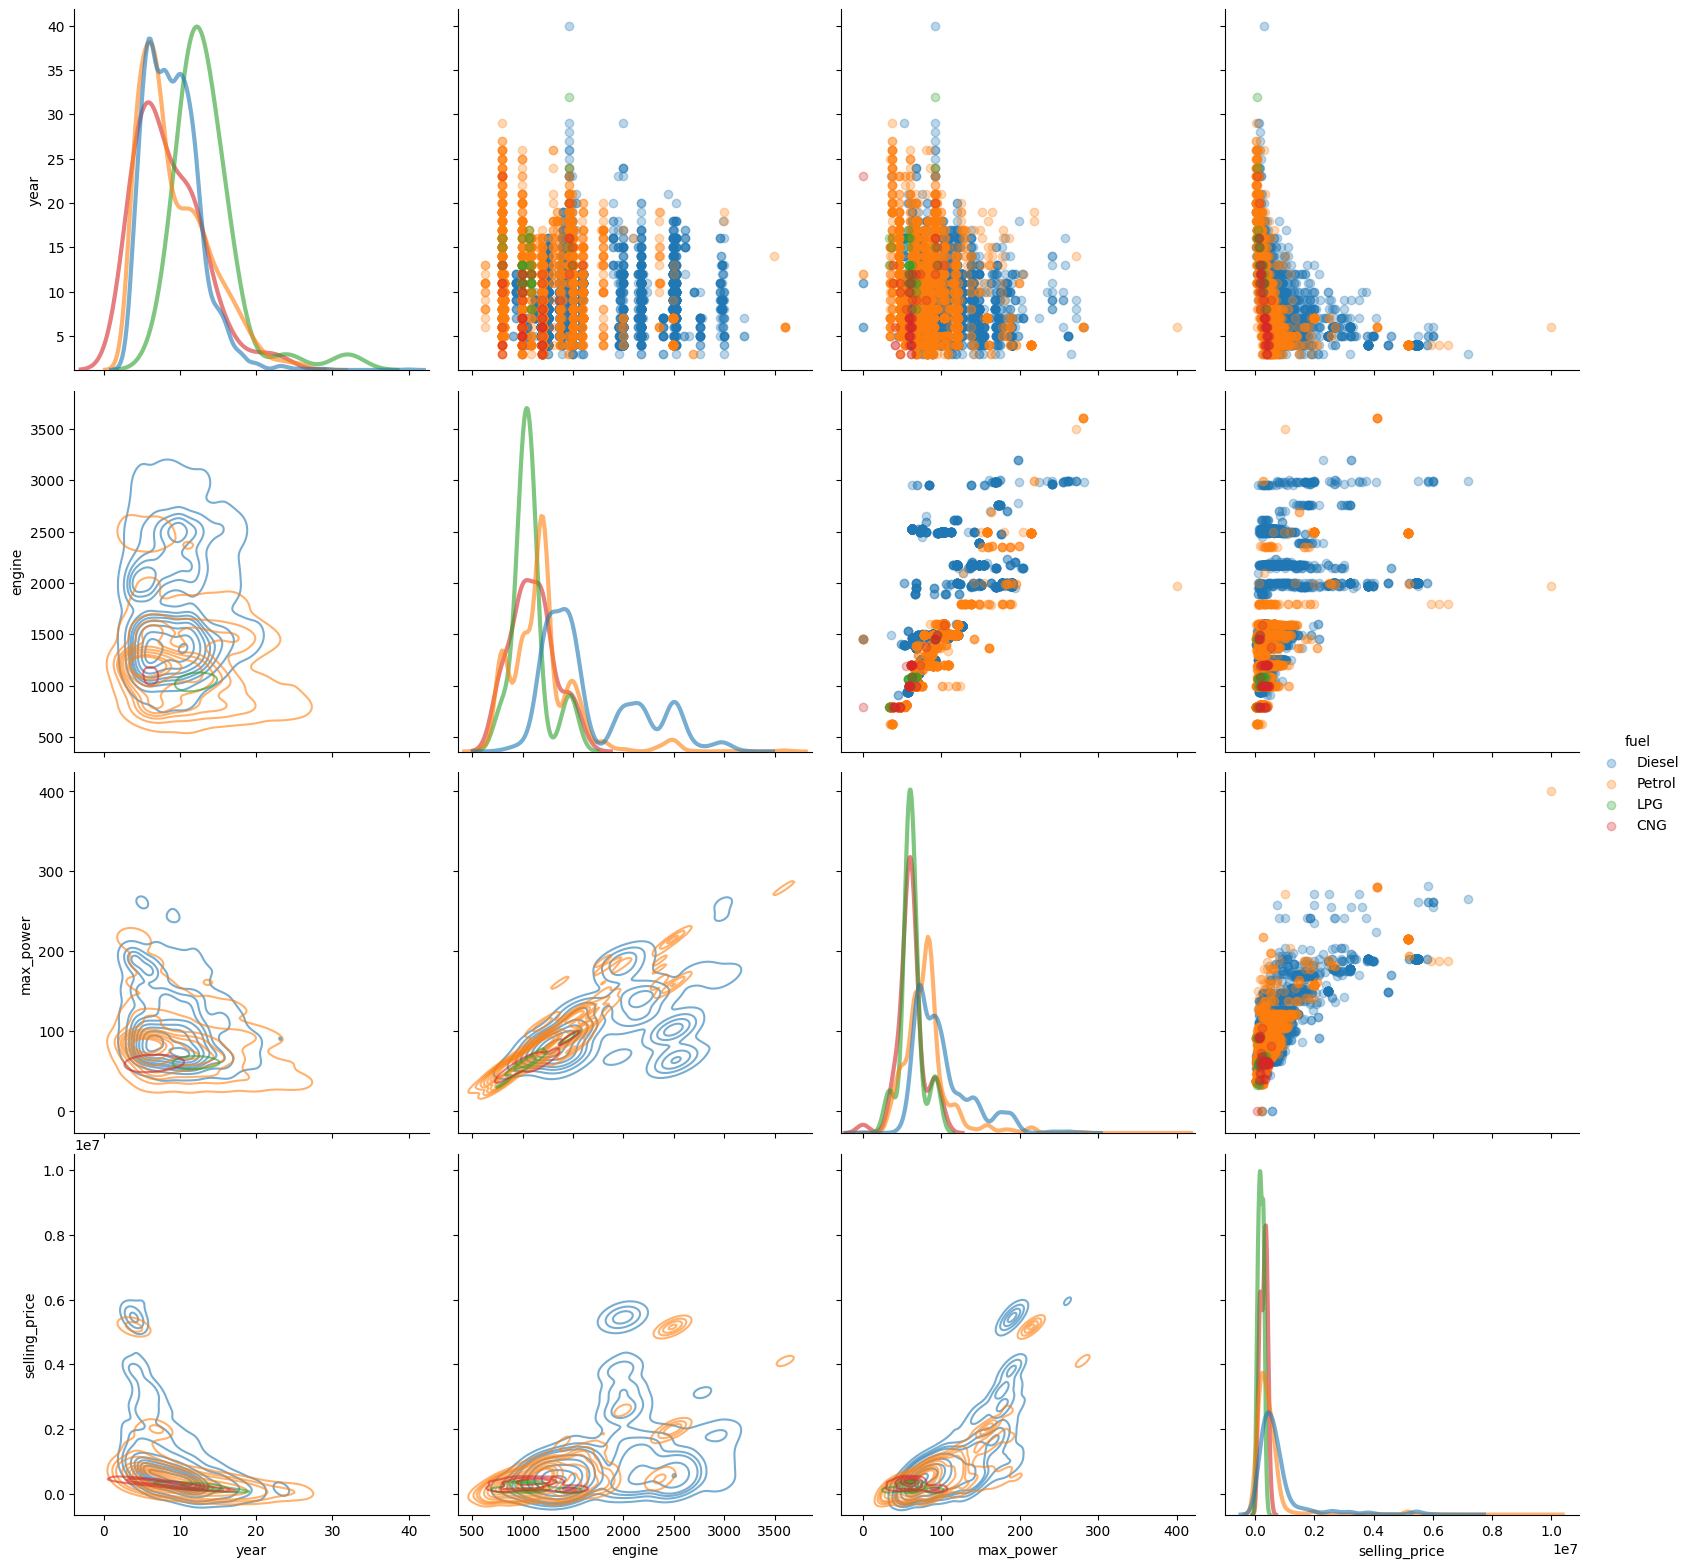

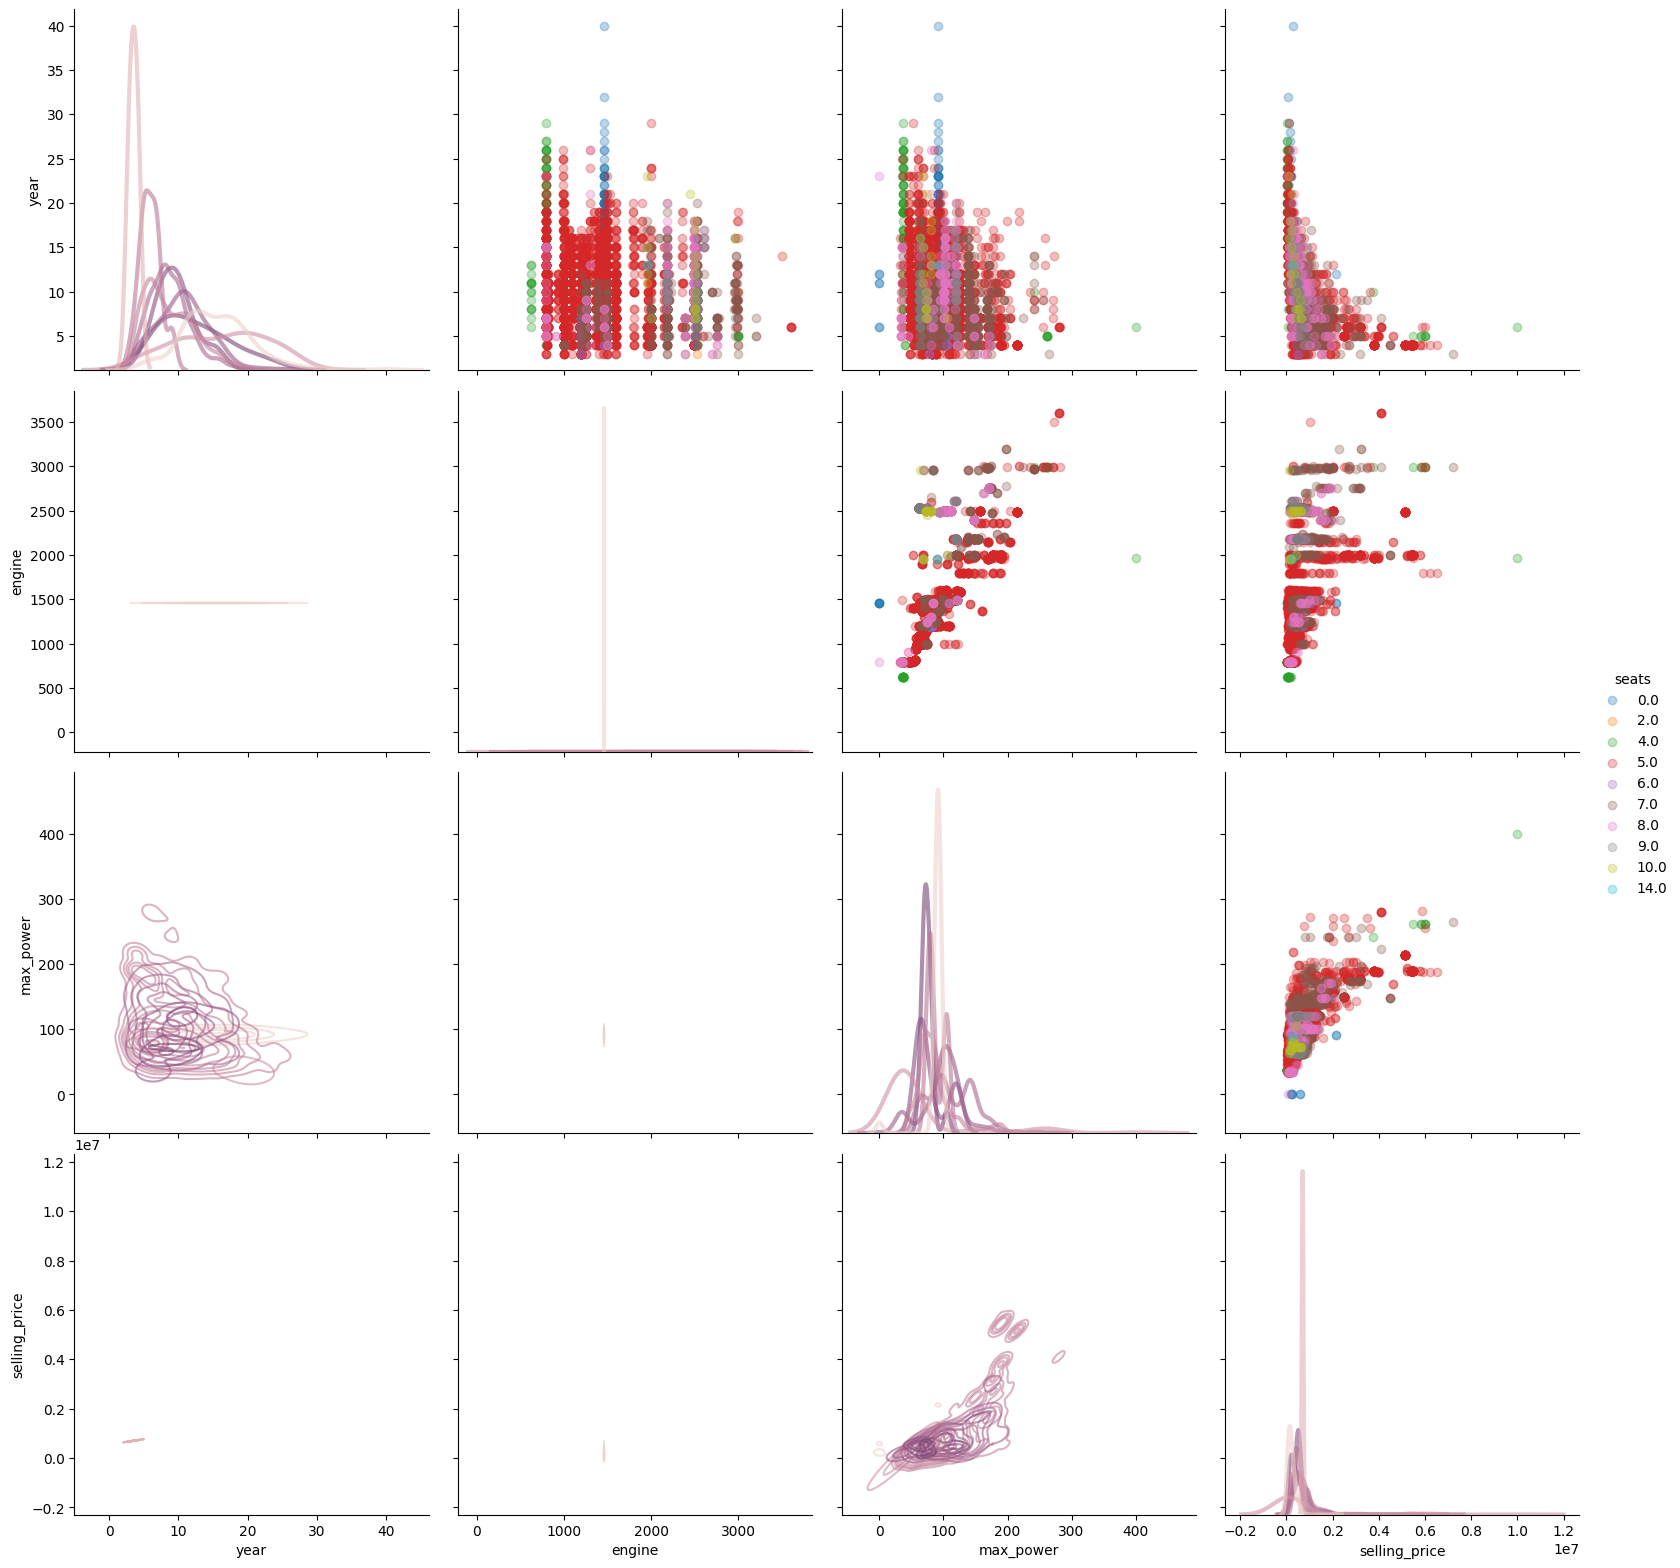

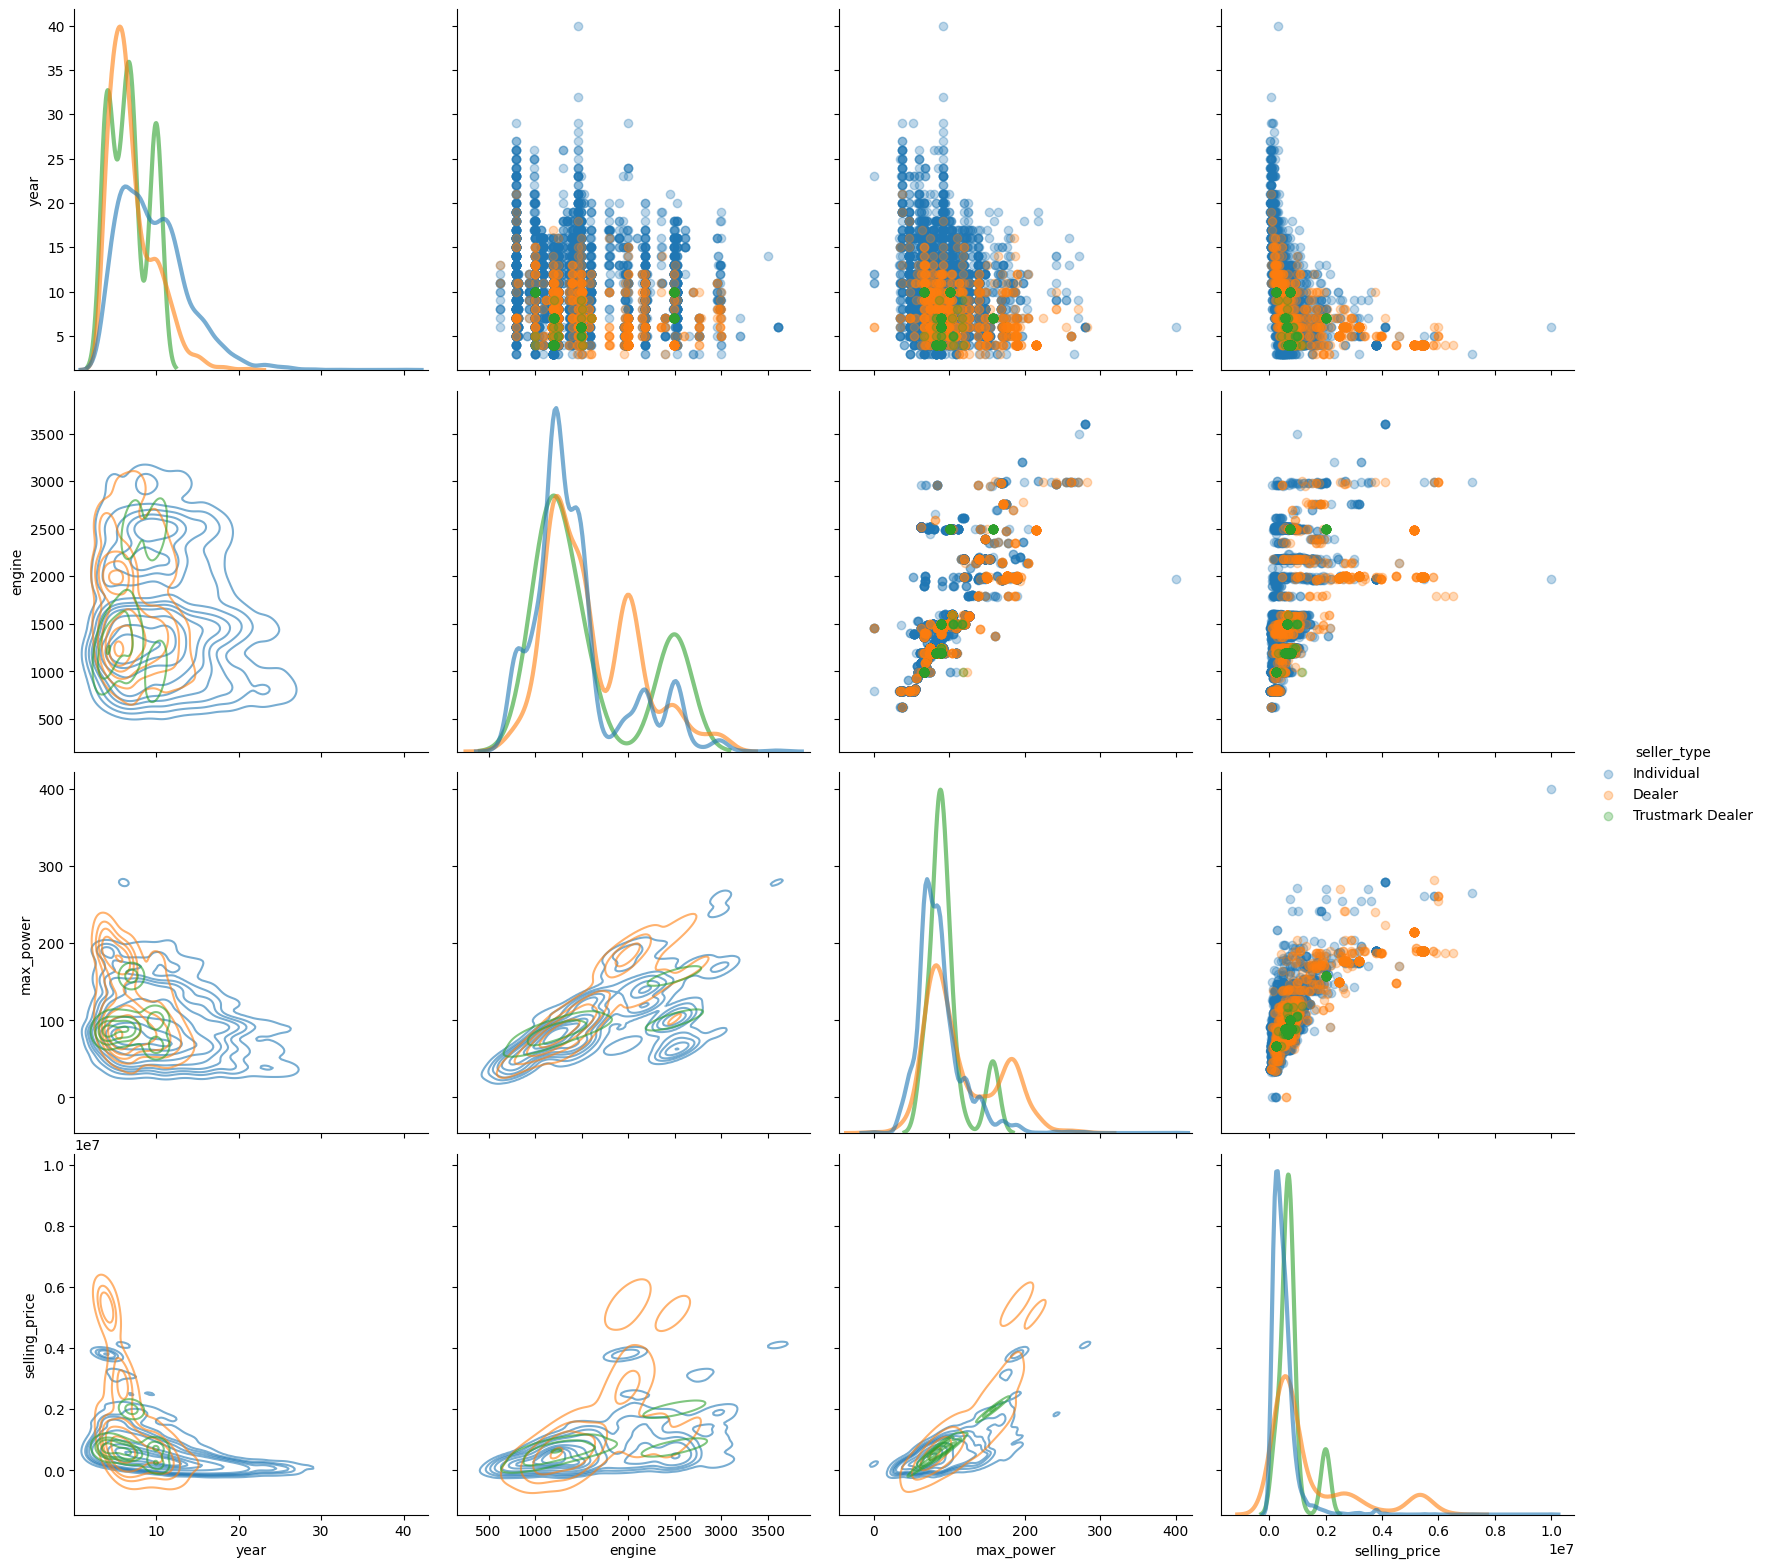

In [ ]:
for hue in categorial_features:
    g = sns.PairGrid(df_4[['year', 'engine', 'max_power', 'selling_price', hue]],hue=hue, diag_sharey=False, height=4)


    g.map_lower(sns.kdeplot, alpha=0.6, warn_singular=False)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, warn_singular=False,
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании

    g.add_legend()

Кол-во мест и расход почти не влияет на цену, а вот возраст, кол-во владельцев и тип топлива сильно влияют на цену

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import metrics



Разобъем данные на тренировочную и тестовую части

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=42)
X_train.shape, X_test.shape

((5949, 10), (1050, 10))

In [ ]:
categorical = categorial_features

In [ ]:
numeric_features =  [col for col in X_train.columns if col not in categorical]

In [ ]:
numeric_features

['transmission', 'year', 'engine', 'engine_type', 'max_power', 'torque']

In [ ]:
categorical

['name', 'fuel', 'seats', 'seller_type']

In [ ]:
real_features

['year', 'transmission', 'max_power', 'engine', 'engine_type', 'torque']

In [ ]:
X_train.head(5)

name    fuel  transmission  year seats seller_type       engine  \
4661    Maruti  Diesel             0     7   5.0  Individual  1248.000000   
2698   Hyundai  Petrol             0    14   5.0  Individual  1495.000000   
4172     Force  Diesel             0     9   7.0  Individual  2200.000000   
2986  Mahindra  Diesel             0     8   7.0  Individual  2179.000000   
5489   Hyundai  Petrol             1    17   0.0  Individual  1458.327203   

      engine_type   max_power      torque  
4661            1   74.000000  190.000000  
2698            1   94.000000  122.500000  
4172            1  139.010000  321.000000  
2986            1  120.000000  280.000000  
5489            0   91.486573  180.820614

### Трансформирование признаков

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train_transformed

array([[0.        , 0.        , 0.        , ..., 1.        , 0.185     ,
        0.07876758],
       [0.        , 0.        , 0.        , ..., 1.        , 0.235     ,
        0.04157667],
       [0.        , 0.        , 0.        , ..., 1.        , 0.347525  ,
        0.15094548],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.20465   ,
        0.03675563],
       [0.        , 0.        , 0.        , ..., 1.        , 0.22125   ,
        0.08427734],
       [0.        , 0.        , 0.        , ..., 1.        , 0.13325   ,
        0.01375237]])

In [ ]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)


In [ ]:

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head(3)

name_Audi  name_BMW  name_Chevrolet  name_Daewoo  name_Datsun  name_Fiat  \
0        0.0       0.0             0.0          0.0          0.0        0.0   
1        0.0       0.0             0.0          0.0          0.0        0.0   
2        0.0       0.0             0.0          0.0          0.0        0.0   

   name_Force  name_Ford  name_Honda  name_Hyundai  ...  seats_10.0  \
0         0.0        0.0         0.0           0.0  ...         0.0   
1         0.0        0.0         0.0           1.0  ...         0.0   
2         1.0        0.0         0.0           0.0  ...         0.0   

   seats_14.0  seller_type_Individual  seller_type_Trustmark Dealer  \
0         0.0                     1.0                           0.0   
1         0.0                     1.0                           0.0   
2         0.0                     1.0                           0.0   

   transmission      year    engine  engine_type  max_power    torque  
0           0.0  0.108108  0.209396          1.0   0.185000  0.078768  
1           0.0  0.297297  0.292282          1.0   0.235000  0.041577  
2           0.0  0.162162  0.528859          1.0   0.347525  0.150945  

[3 rows x 48 columns]

In [ ]:
model = LinearRegression(fit_intercept=True)

model.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
model.score(X_test_transformed, y_test).round(3)

0.838

Выполним предсказание построенной ранее моделью с помощью метода predict

In [ ]:
test_preds = model.predict(X_test_transformed)

In [ ]:
train_preds = model.predict(X_train_transformed)

In [ ]:
metrics.mean_squared_error(y_test, test_preds) ** 0.5

307934.27136252064

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [ ]:
mean_absolute_percentage_error(y_test, test_preds)

46.977759414726506

In [ ]:
train_preds = model.predict(X_train_transformed)

metrics.mean_squared_error(y_train, train_preds) ** 0.5, \
metrics.mean_absolute_error(y_train, train_preds), \
mean_absolute_percentage_error(y_train, train_preds)

(313836.29838966514, 162315.6704402263, 44.96551240328383)